In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.svm import SVC

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [3]:
from scipy.io import loadmat

In [4]:
df = loadmat('ex6data1.mat')
df.keys()

['y', 'X', '__version__', '__header__', '__globals__']

In [5]:
X = df['X']
y = df['y']
print X.shape, y.shape

(51L, 2L) (51L, 1L)


In [6]:
def plotData(X,y):
    pos = (y==1).ravel()
    neg = (y==0).ravel()
    plt.scatter(X[pos,0], X[pos,1], s=60, c='k', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=60, c='y', marker='o', linewidths=1)

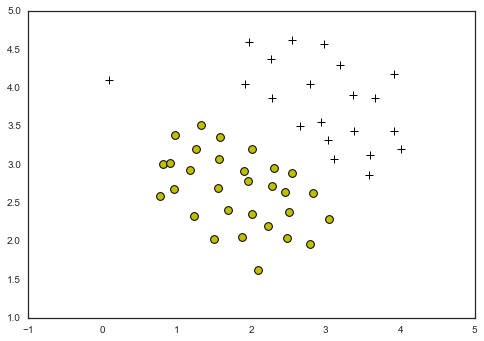

In [7]:
plotData(X,y)

In [8]:
from sklearn.svm import SVC

In [9]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plotData(X, y)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

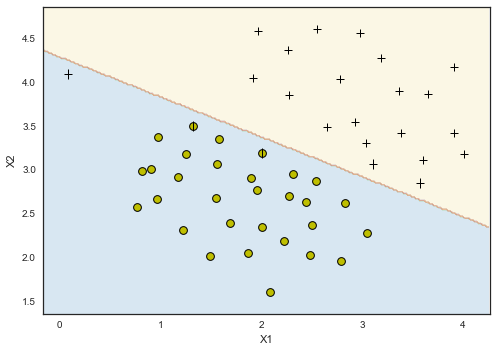

('Number of support vectors: ', 5)


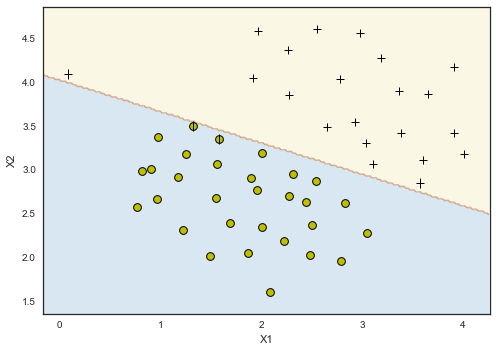

('Number of support vectors: ', 4)


In [10]:
for i in range(15,100,50):
    clf = SVC(C=i+1, kernel='linear')
    clf.fit(X,y.ravel())
    plot_svc(clf,X,y)

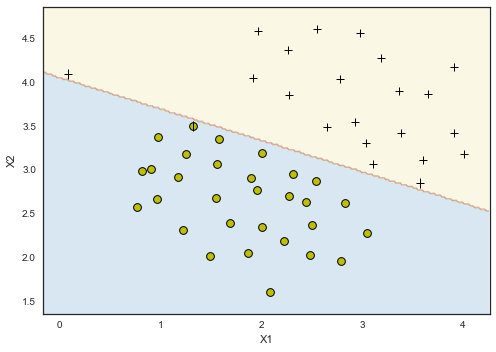

('Number of support vectors: ', 3)


In [11]:
clf.set_params(C=100)
clf.fit(X,y.ravel())
plot_svc(clf,X,y)

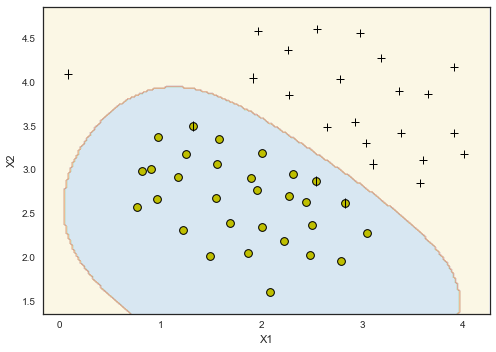

('Number of support vectors: ', 6)


In [12]:
clf.set_params(kernel="rbf")
clf.fit(X,y.ravel())
plot_svc(clf,X,y)

In [13]:
df2 = loadmat('ex6data2.mat')
df2.keys()

['y', 'X', '__version__', '__header__', '__globals__']

In [14]:
X2 = df2['X']
y2 = df2['y']
print X2.shape, y2.shape

(863L, 2L) (863L, 1L)


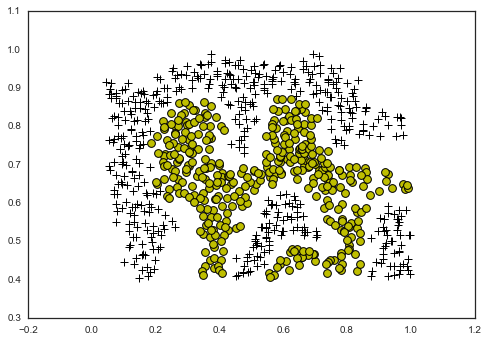

In [15]:
plotData(X2,y2)

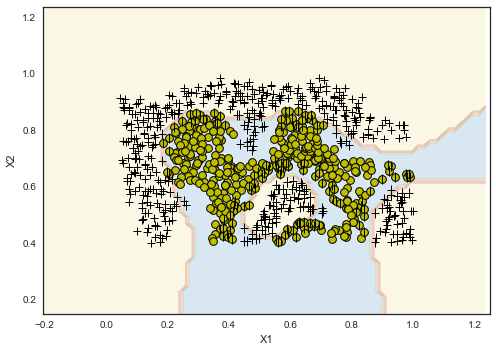

('Number of support vectors: ', 254)


In [16]:
clf = SVC(C=50, kernel='rbf', gamma=6)
clf.fit(X2, y2.ravel())
plot_svc(clf,X2,y2)

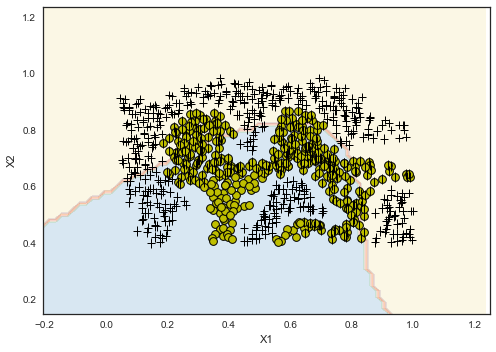

('Number of support vectors: ', 628)


In [17]:
clf.set_params(kernel='poly')
clf.fit(X2,y2.ravel())
plot_svc(clf,X2,y2)

In [18]:
df3 = loadmat('ex6data3.mat')

In [19]:
df3.keys()

['yval', '__header__', '__globals__', 'Xval', 'y', 'X', '__version__']

In [20]:
X3 = df3['X']
y3 = df3['y']

In [21]:
print X3.shape, y3.shape

(211L, 2L) (211L, 1L)


In [22]:
X3val = df3['Xval']
y3val = df3['yval']
print X3val.shape, y3val.shape

(200L, 2L) (200L, 1L)


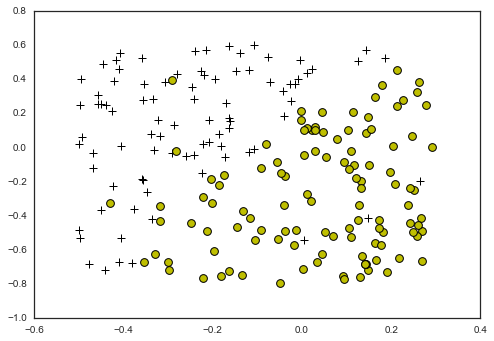

In [23]:
plotData(X3val, y3val)

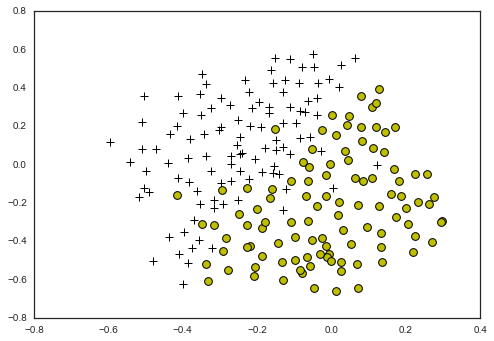

In [24]:
plotData(X3, y3)

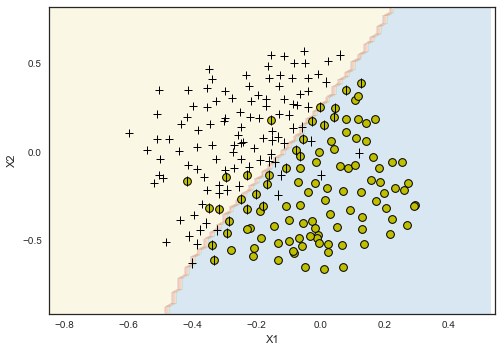

('Number of support vectors: ', 55)


In [25]:
clf= SVC(C=50, kernel='rbf')
clf.fit(X3,y3.ravel())
plot_svc(clf, X3, y3)

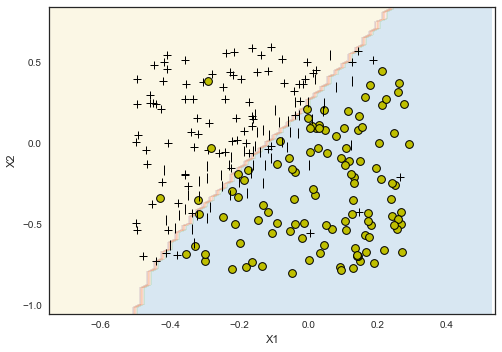

('Number of support vectors: ', 55)


In [26]:
plot_svc(clf,X3val,y3val)

In [27]:
dfv = pd.read_table('vocab.txt', header=None)


In [28]:
def get_data(file_name):
    df4 = open(file_name,'r')
    s = []
    d = []
    df4 = [i.strip().lower() for i in df4 if i!='\n' and i!='']
    for i in df4:
        i = i.split(' ')
        s.extend(i)
    data = [v for v in s if v.isalnum()]
    for v in data:
        if v.isdigit():
            d.append('number')
        else:
            d.append(v)
    return " ".join(i for i in d)

In [29]:
import nltk
from nltk.stem.porter import PorterStemmer

In [30]:
def stem_out(data):
    stemmer = PorterStemmer()
    sw = stemmer.stem(data).split(' ')
    return sw

In [31]:
def get_features_array(sw):
    X_v = []
    for v in dfv[1]:
        if v in sw:
            X_v.append(1)
        else:
            X_v.append(0)
    return np.array(X_v).reshape(1,-1)

In [39]:
data = get_data('mongodbspam.txt')
sw = stem_out(data)
X_v =  get_features_array(sw)
if clf.predict(X_v) == [0]:
    print "This is not a Spam email!"
else:
    print "This is a Spam email!"

This is not a Spam email!


In [464]:
clf.predict(X_v)

array([1], dtype=uint8)

In [337]:
D ={}
for i in range(dfv.shape[0]):
    D[dfv[1][i]] =i+ 1


In [376]:
X_spam, X_v = [], []
for i in sw:
    try:
        if D[i]:
            X_spam.append(1)
    except:
        #X_spam.append(0)
        pass

In [34]:
dfS = loadmat('spamTrain.mat')

In [36]:
XS = dfS['X']
yS = dfS['y']

In [37]:
clf = SVC(C=10, kernel='linear')
clf.fit(XS,yS.ravel())
P = clf.predict(XS)
from sklearn.metrics import accuracy_score
accuracy_score(P, yS)

1.0

In [400]:
dfTe = loadmat('spamTest.mat')
print dfTe.keys()

['ytest', 'Xtest', '__version__', '__header__', '__globals__']


In [402]:
P = clf.predict(dfTe['Xtest'])
accuracy_score(P, dfTe['ytest'])

0.97499999999999998

In [404]:
print D

{'four': 679, 'sleep': 1531, 'hate': 755, 'whose': 1846, 'aug': 133, 'sorri': 1553, 'under': 1745, 'spec': 1565, 'merchant': 1031, 'digit': 454, 'everi': 575, 'risk': 1426, 'dollar': 477, 'dell': 427, 'govern': 727, 'affect': 35, 'cnet': 302, 'school': 1456, 'prize': 1306, 'reg': 1383, 'wednesdai': 1826, 'direct': 455, 'enjoi': 547, 'second': 1464, 'street': 1598, 'even': 571, 'neg': 1094, 'calcul': 232, 'toll': 1704, 'new': 1099, 'net': 1095, 'ever': 574, 'told': 1703, 'elimin': 528, 'abov': 6, 'men': 1028, 'here': 775, 'china': 284, 'path': 1224, 'militari': 1041, 'anymor': 85, 'jame': 887, 'smoke': 1535, 'mime': 1043, 'studi': 1603, 'campaign': 237, 'ftoc': 690, 'unix': 1752, 'total': 1713, 'unit': 1750, 'highli': 781, 'describ': 433, 'would': 1876, 'suit': 1616, 'tm': 1698, 'call': 234, 'asset': 119, 'recommend': 1376, 'type': 1741, 'tell': 1652, 'pudg': 1339, 'relat': 1390, 'yahoo': 1886, 'notic': 1116, 'warn': 1812, 'phone': 1244, 'warm': 1811, 'adult': 27, 'hold': 786, 'must': 1

In [429]:
X_v = []
for v in dfv[1]:
    if v in sw:
        X_v.append(1)
    else:
        X_v.append(0)
X_v = np.array(X_v)


In [462]:
print XS.shape
print dfTe['Xtest'].shape
clf.predict(X_v.reshape(1,-1))


(4000L, 1899L)
(1000L, 1899L)


array([1], dtype=uint8)